In [1]:
import warnings
import os
import json
import sys
import datetime
start_timestamp = datetime.datetime.now()

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# from trips_count_predictor.city_loader.city_loader import CityLoader

warnings.simplefilter(action='ignore')

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import os
root = '/Users/mc/Desktop/ThesisPlots/p_IEEE_ACM_DS_RT_2020/'
data_path = os.path.join(root, 'Data', 'Minneapolis')
trips = pd.DataFrame()
for file in os.listdir(data_path):
    if 'csv' in file:
        trips = trips.append(pd.read_csv(os.path.join(data_path, file)))
trips.shape
os.listdir(data_path)

['.DS_Store',
 'Motorized_Foot_Scooter_Trips_July_2019.csv',
 'Motorized_Foot_Scooter_Trips_June_2019.csv',
 'merge_minneapolis.py',
 'Motorized_Foot_Scooter_Trips_November_2019.csv',
 'Motorized_Foot_Scooter_Trips_October_2019.csv',
 'Motorized_Foot_Scooter_Trips_August_2019.csv',
 'Motorized_Foot_Scooter_Trips_September_2019.csv',
 'Motorized_Foot_Scooter_Trips_May_2019.csv']

In [7]:
# city_loader = CityLoader("Minneapolis")
# trips = city_loader.load_raw_trips_data("city_of_minneapolis", 2019, 5)

In [8]:
trips.columns

Index(['TripID', 'TripDuration', 'TripDistance', 'StartTime', 'EndTime',
       'StartCenterlineID', 'StartCenterlineType', 'EndCenterlineID',
       'EndCenterlineType', 'ObjectId', 'FID'],
      dtype='object')

In [9]:
trips.head()

,TripID,TripDuration,TripDistance,StartTime,EndTime,StartCenterlineID,StartCenterlineType,EndCenterlineID,EndCenterlineType,ObjectId,FID
0,177251,249,810,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,16614.00,street,17053.00,street,1001.0,NaN
1,177262,440,1371,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,18749.00,street,17317.00,street,1002.0,NaN
2,177266,334,607,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,16615.00,street,19244.00,street,1003.0,NaN
3,177268,751,3292,2019-07-01T18:00:00.000Z,2019-07-01T18:30:00.000Z,11279.00,street,0A7745DD-4328-4460-A945-DC4E2FC05B14,trail,1004.0,NaN
4,177272,899,3908,2019-07-01T18:00:00.000Z,2019-07-01T18:30:00.000Z,12676ACC-202B-4EFF-A91F-C28307D4783C,trail,10323.00,street,1005.0,NaN


In [14]:
trips.StartCenterlineID.describe()

count     519357.0
unique     14568.0
top        18754.0
freq        4000.0
Name: StartCenterlineID, dtype: float64

In [10]:
shp_path = os.path.join(root, 'Data', 'MPLS_Centerline-shp', 
                        '9b43763e-b7c0-4eb2-89b4-219b4fcc2c912020328-1-dftyqs.90rzj.dbf')
geo = gpd.read_file(shp_path)

In [11]:
geo.columns

Index(['OBJECTID', 'L_F_ADD', 'R_F_ADD', 'L_T_ADD', 'R_T_ADD', 'STREETALL',
       'F_CLASS', 'ALT_NAM1', 'ALT_NAM2', 'ZIP5_L', 'ZIP5_R', 'CITYLEFT',
       'CITYRIGT', 'PREDIR', 'STREETNAME', 'TYPE', 'SUFDIR', 'SPEED_LIM',
       'HIGHWAY_NU', 'ALT_ID', 'GBSID', 'COUNTYRIGT', 'COUNTYLEFT', 'ONEWAY',
       'MSLINK', 'F_XSTREET_', 'F_XSTREE_1', 'F_XSTREE_2', 'T_XSTREET_',
       'T_XSTREE_1', 'T_XSTREE_2', 'GlobalID', 'FromLanes', 'ToLanes',
       'Shape__Len', 'geometry'],
      dtype='object')

In [12]:
geo.geometry

0        LINESTRING (-93.30114 45.00486, -93.30165 45.0...
1        LINESTRING (-93.31378 44.91240, -93.31251 44.9...
2        LINESTRING (-93.29683 45.00596, -93.29683 45.0...
3        LINESTRING (-93.27662 44.93593, -93.27533 44.9...
4        LINESTRING (-93.24403 44.97554, -93.24374 44.9...
                               ...                        
13832    LINESTRING (-93.28954 44.97794, -93.29075 44.9...
13833    LINESTRING (-93.26284 44.97028, -93.26303 44.9...
13834    LINESTRING (-93.29538 44.97599, -93.29529 44.9...
13835    LINESTRING (-93.29538 44.97599, -93.29548 44.9...
13836    LINESTRING (-93.29544 44.97405, -93.29543 44.9...
Name: geometry, Length: 13837, dtype: geometry

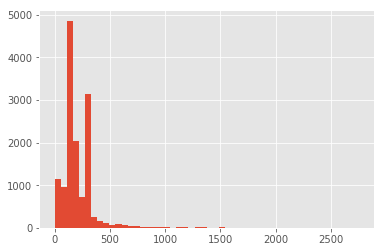

In [13]:
geo.geometry.to_crs({"init":"epsg:3857"}).length.hist(bins=50)

In [14]:
geo.geometry.apply(lambda x: len(x.coords))

0         5
1         2
2         2
3         2
4         8
         ..
13832     2
13833     2
13834     8
13835    17
13836     6
Name: geometry, Length: 13837, dtype: int64

(array([-93.296  , -93.29575, -93.2955 , -93.29525]),
 <a list of 4 Text xticklabel objects>)

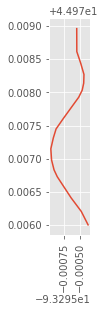

In [15]:
geo.iloc[13835:13836].plot()
plt.xticks(rotation="vertical")

In [21]:
def get_random_point_from_linestring (linestring):
    linestring_coords = linestring.coords
    segment_index = np.random.randint(0, len(linestring_coords)-1)
    random_segment = LineString([
        Point(linestring_coords[segment_index]), 
        Point(linestring_coords[(segment_index+1)])
    ])
    u = np.random.rand()
    x1, x2 = random_segment.coords[0][0], random_segment.coords[1][0]
    y1, y2 = random_segment.coords[0][1], random_segment.coords[1][1]
    random_x = (1-u)*x1 + u*x2
    random_y = (1-u)*y1 + u*y2
    random_point = Point(random_x, random_y)
    random_segment.__str__(), random_point.__str__(), random_segment.distance(random_point) < 1e-10
    return random_point

In [22]:
geo.GBSID.describe()

count    13837.000000
mean     17177.483992
std       4348.836010
min      10001.000000
25%      13482.000000
50%      17011.000000
75%      20554.000000
max      26152.000000
Name: GBSID, dtype: float64

In [34]:
trips["start_GBSID"] = trips.StartCenterlineID
trips= trips[(trips["StartCenterlineType"] == "street") & (trips["EndCenterlineType"] == "street")]
trips.StartCenterlineID = trips.StartCenterlineID.astype(float)
trips.EndCenterlineID = trips.EndCenterlineID.astype(float)


In [35]:
trips

,TripID,TripDuration,TripDistance,StartTime,EndTime,StartCenterlineID,StartCenterlineType,EndCenterlineID,EndCenterlineType,ObjectId,FID,start_GBSID
0,177251,249,810,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,16614.0,street,17053.0,street,1001.0,NaN,16614.00
1,177262,440,1371,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,18749.0,street,17317.0,street,1002.0,NaN,18749.00
2,177266,334,607,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,16615.0,street,19244.0,street,1003.0,NaN,16615.00
5,177273,389,1855,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,11509.0,street,16636.0,street,1006.0,NaN,11509.00
6,177053,1377,5434,2019-07-01T17:30:00.000Z,2019-07-01T17:30:00.000Z,17240.0,street,20467.0,street,1007.0,NaN,17240.00
...,...,...,...,...,...,...,...,...,...,...,...,...
39752,38617,219,656,2019-05-31T12:00:00.000Z,2019-05-31T12:00:00.000Z,16717.0,street,19544.0,street,36996.0,NaN,16717
39753,38464,698,2873,2019-05-31T05:30:00.000Z,2019-05-31T06:00:00.000Z,18343.0,street,16803.0,street,36997.0,NaN,18343
39754,38252,5966,4313,2019-05-31T03:30:00.000Z,2019-05-31T05:00:00.000Z,20799.0,street,17086.0,street,36998.0,NaN,20799
39755,38256,557,1363,2019-05-31T03:30:00.000Z,2019-05-31T03:30:00.000Z,16942.0,street,19782.0,street,36999.0,NaN,16942


In [36]:
trips_origins = gpd.GeoDataFrame(pd.merge(
    trips, geo, left_on="StartCenterlineID", right_on="GBSID"
)).sample(frac=1)

trips_destinations = gpd.GeoDataFrame(pd.merge(
    trips, geo, left_on="EndCenterlineID", right_on="GBSID"
)).sample(frac=1)

In [37]:
%%time
trips_origins.geometry = trips_origins.geometry.apply(get_random_point_from_linestring)
trips_destinations.geometry = trips_destinations.geometry.apply(get_random_point_from_linestring)

CPU times: user 5min 35s, sys: 1.8 s, total: 5min 37s
Wall time: 5min 42s


In [ ]:
trips_origins.columns

In [ ]:
trips_origins.index

In [ ]:
trips_origins.geometry.head()

In [ ]:
trips_origins.plot()

In [ ]:
trips_destinations.plot()

In [38]:
output_path = os.path.join(root, 'Data', 'Minneapolis.csv')
trips.to_csv(output_path, index=False)